1. AIR QUALITY ANALYSIS USINF AIR QUALITY INDEX

In [76]:
import pandas as pd
stations = ['alipur','dhyan-chand-stadium',
          'dite-okhla','iti-jahangirpuri',
          'jawaharlal-nehru-stadium','mandir-marg','mundka',
          'narela','punjabi-bagh','pusa','r.k.-puram',
          'sonia-vihar','wazirpur']
data_path = 'data/'
output_path = 'outputs/'
years_path = "output_in_years/"
delhi_data = 'delhi_data/'

READING THE DOWNLOADED DATA

In [77]:
# reading the file

def read_one(path,st):
    df = pd.read_csv(path+st+'.csv')                                   #reading the data
    return(df)                                                  #copying it to another df
 

CLEANING THE DATASETS

In [78]:
# cleaning the data

def clean_data(df,o,st):                                                  
    #changed the date data type to datetimetype for its manipulation
    df["date"] = pd.to_datetime(df["date"])
    #sorting date
    df.sort_values(by ='date', inplace=True)
    #duplicate data were removed
    df.drop_duplicates(inplace = True)
    #replace empty values with 0
    df.replace(' ', '0', inplace = True)
    #formatting the headings
    df = df.rename(columns = {" pm25": "pm25", " pm10":"pm10", " o3": "o3",' no2' : 'no2',' so2' : 'so2',' co' : 'co'})
    df = df.astype({'pm25':'int64','pm10' :'int64','o3':'int64','no2':'int64','so2':'int64','co':'int64'})
    #adding a column to keep the values of aqi
    df['aqi']=df[['pm25','pm10','o3','no2','so2','co']].max(axis=1)
    #keeping only datas from 2019- 2021
    dfx = df.loc[df['date']>'2018-12-31']
    df_new = dfx.loc[dfx['date']<'2022-01-01']
    #setting date as the index
    df_new.set_index('date', inplace=True)
    #filling the missing dates
    idx = pd.date_range('01-01-2019', '31-12-2021',freq='D')
    df_new = df_new.reindex(index=idx, fill_value=0)
    df_new.reset_index(inplace=True)
    df_new = df_new.rename({'index': 'date'}, axis=1)
    #converting df into new csv files which has cleaned data
    df_new.to_csv(o+st+'_cleaned.csv',index=False)
    
    #making 3 different csv files for the resepctive years for the respective stations
    sep_year(df_new,years_path,st)
 



SEPERATING IT INTO RESPECTVE YEARS

In [79]:
def sep_year(df,o,st):
    
    
    #19
    dfx = df.loc[df['date']>'2018-12-31']
    df19 = dfx.loc[dfx['date']<'2020-01-01']
    df19.to_csv(o+"2019/"+st+'_19.csv',index=False)
    #df19.to_excel(o+"2019/"+st+'_19.xlsx', index=False)
    #print(df19)

    #20
    dfx = df.loc[df['date']>'2019-12-31']
    df20 = dfx.loc[dfx['date']<'2021-01-01']
    df20.to_csv(o+"2020/"+st+'_20.csv',index=False)
    #df20.to_excel(o+"2020/"+st+'_20.xlsx', index=False)
    #print(df20)

    #21
    dfx = df.loc[df['date']>'2020-12-31']
    df21 = dfx.loc[dfx['date']<'2022-01-01']
    df21.to_csv(o+"2021/"+st+'_21.csv',index=False)
    #df21.to_excel(o+"2021/"+st+'_21.xlsx', index=False)
    #print(df21)


In [80]:
for x in stations:
    d=read_one(data_path,x)
    clean_data(d,output_path,x)

AVERAGING THE DATASET FOR DELHI

In [81]:
dfs = {}
ls = ['date','pm25','pm10','o3','no2','so2','co','aqi']
for i in stations:
    dfs[i] = read_one(output_path,i+"_cleaned")

df = pd.concat(dfs,axis=0)
foo = df.groupby(level=1).mean(ls)

foo['date'] = pd.date_range(start='1/1/2019', periods=len(foo), freq='D')

#converting df into new csv files which was from cleaned data
foo.to_csv(delhi_data+'Delhi_avg_data.csv',index=False)
    
#making 3 different csv files for the resepctive years for the respective stations
#19
dfx = foo.loc[foo['date']>'2018-12-31']
df19 = dfx.loc[dfx['date']<'2020-01-01']
df19.to_csv(delhi_data+'Delhi_2019.csv',index=False)
#print(df19)

#20
dfx = foo.loc[foo['date']>'2019-12-31'] 
df20 = dfx.loc[dfx['date']<'2021-01-01']
df20.to_csv(delhi_data+'Delhi_2020.csv',index=False)
#print(df20)

#21
dfx = foo.loc[foo['date']>'2020-12-31']
df21 = dfx.loc[dfx['date']<'2022-01-01']
df21.to_csv(delhi_data+'Delhi_2021.csv',index=False)
#print(df21)


In [89]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

PLOTTING VARIATIONS POLLUATANTS FOR THE MONTH OF NOVEMBER 

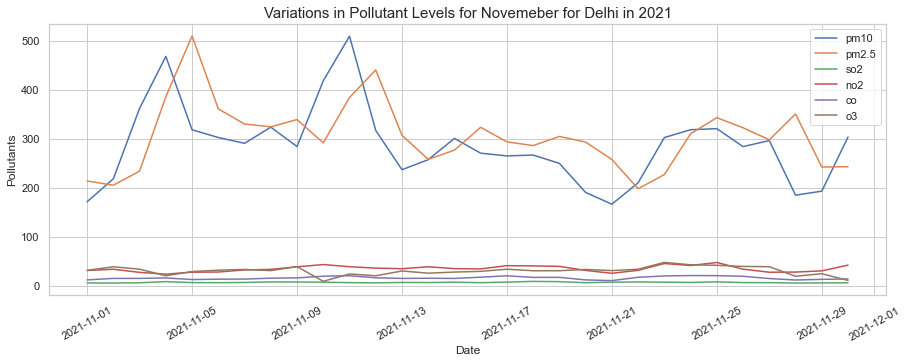

In [83]:

df=read_one(delhi_data,"Delhi_avg_data")
df['date'] = pd.to_datetime(df['date'])
#seperating the month november
dfx = df.loc[df['date']>'2021-10-31']
dfn= dfx.loc[dfx['date']<'2021-12-01']
#plotting the graph
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dfn.date,dfn.pm10,label="pm10")
ax.plot(dfn.date,dfn.pm25,label="pm2.5")
ax.plot(dfn.date,dfn.so2,label='so2')
ax.plot(dfn.date,dfn.no2,label='no2')
ax.plot(dfn.date,dfn.co,label='co')
ax.plot(dfn.date,dfn.o3,label='o3')
ax.set_ylabel('Pollutants',fontsize=12)
ax.set_xlabel('Date',fontsize=12)
ax.legend()
plt.tick_params(axis='x', labelrotation=30)
ax.set_title('Variations in Pollutant Levels for Novemeber for Delhi in 2021',fontsize=15)
fig.savefig('delhi_data\Pollutants_Nov_2021.jpg')
plt.show()

PLOTTING BOXPLOTS FOR AQI FOR 3 YEARS (2019,2020 AND 2021)

For the year 2019
       obs_days  severe_days
month                       
1            31           15
2            28            2
3            31            0
4            30            0
5            31            4
6            30            1
7            31            2
8            31            0
9            30            0
10           31            4
11           30            8
12           31            8
For the year 2020
       obs_days  severe_days
month                       
1            31            2
2            29            0
3            31            0
4            30            0
5            31            0
6            30            0
7            31            0
8            31            0
9            30            0
10           31            6
11           30           15
12           31           12
For the year 2021
       obs_days  severe_days
month                       
1            31           12
2            28            1
3            31   

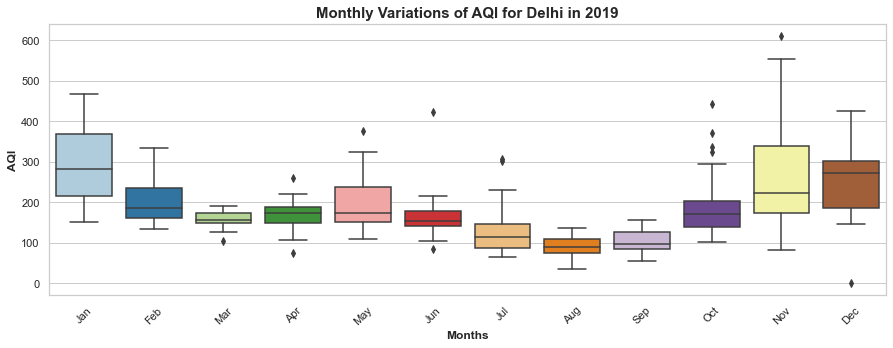

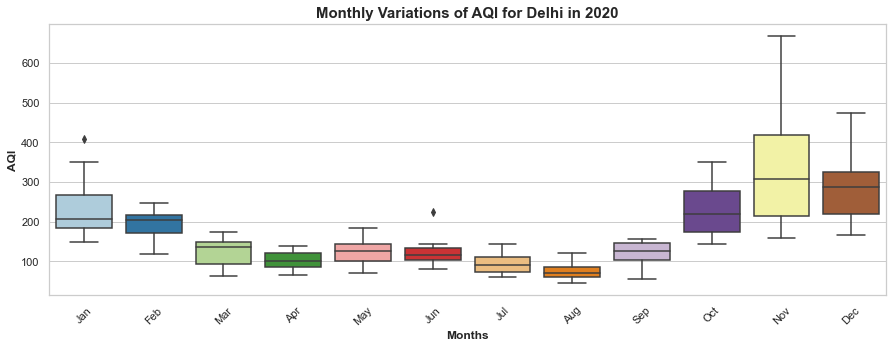

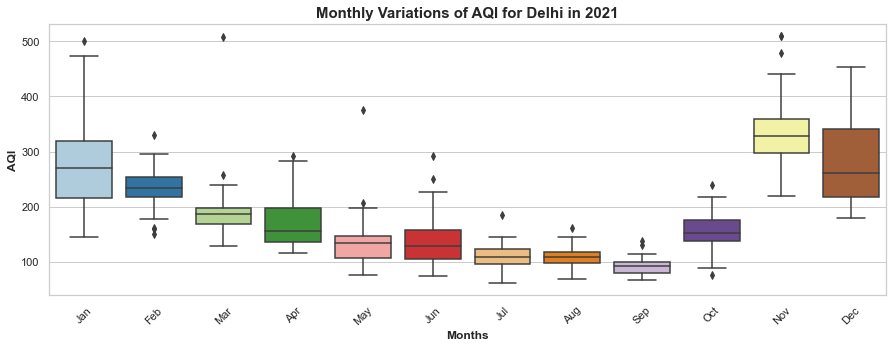

In [84]:
yrs=['2019','2020','2021']
for i in yrs:
    df = read_one(delhi_data,'Delhi_'+i)
    df["date"] = pd.to_datetime(df["date"])
    sns.set(style="whitegrid")
    df['month'] = df['date'].dt.strftime('%b')
    fig, ax = plt.subplots()
    fig.set_size_inches((15,5))
    sns.boxplot(x='month',y='aqi',data=df,ax=ax,palette="Paired").set_title('Monthly Variations of AQI for Delhi in '+i,fontdict={'fontsize':15,'weight': 'bold'})
    ax.set_xlabel('Months', fontdict={'fontsize':12,'weight': 'bold'})
    ax.set_ylabel('AQI', fontdict={'fontsize':12,'weight': 'bold'})
    ax.tick_params(axis='x', labelrotation=45)
    severity_aqi(df,i)
    #plt.show()
    fig.savefig('delhi_data\del_mon_var'+i+'.jpg')

NUMBER DAYS WHICH WERE SEVERELY POLLUTED


In [85]:
def severity_aqi(df,i):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['threshold'] = 301
    df['severe'] = np.where(df['aqi'] > df['threshold'], 1,0)
    sev = df.groupby('month').agg(obs_days = pd.NamedAgg(column = 'severe', aggfunc = 'count'),
                                  severe_days = pd.NamedAgg(column = 'severe', aggfunc = 'sum'))
    sev.to_csv('delhi_data\severity_aqi'+i+'.csv',index=True)
    print("For the year",i)
    print(sev)
    


2. AIR QUALITY ANALYSIS USING AEROSOL OPTICAL DEPTH


In [87]:
import os
import ee
ee.Initialize()

COLLECTION SATELLITE DATA FROM GOOGLE EARTH ENGINE

In [88]:
def coll_data(yr,dos,doe):

# Importing the boundaries of the region of interest
    delhi = ee.FeatureCollection("FAO/GAUL/2015/level1")\
            .filter(ee.Filter.eq('ADM1_NAME','Delhi'))


    # Import the raster data on aerosol concentration and apply regional filters.
    asol = ee.ImageCollection("MODIS/006/MCD19A2_GRANULES")\
            .filterBounds(delhi)\
            .filterDate(dos, doe)

    # Reduce the image data into a statistic for Delhi
    def reduce_del(img):
        stat = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=delhi, scale=1000).get('Optical_Depth_047')
        date = img.date().format()
        mydict = {'date': date, 'stat': stat}
        return ee.Feature(None).set(mydict)

    # Convert ImageCollection into FeatureCollection and filter the FeatureCollection keeping only notNull values
    reduced_del = ee.FeatureCollection(asol.map(reduce_del)).filter(ee.Filter.notNull(['date','stat']))

    # Code for exporting Delhi AOD data to GDrive as a batch process.
    task = ee.batch.Export.table.toDrive(
        collection = reduced_del,
        description = 'aod_stat_del'+yr,
        folder = 'satellite',
        fileFormat = 'CSV',
        selectors = ['date','stat'])

    task.start()


In [ ]:
#collecting datas for 2019,2020 and 2021
coll_data('2019','2019-01-01', '2019-12-31')
coll_data('2020','2020-01-01', '2020-12-31')
coll_data('2021','2021-01-01', '2021-12-31')

NORMALISATION OF DATA

In [92]:
def normal_time(df):
    df['date_formatted'] = pd.to_datetime(df['date']).dt.normalize()
    df.stat = df.stat/1000
    df = df.groupby('date_formatted').agg(mean_stat =pd.NamedAgg(column = 'stat', aggfunc = 'mean'))
    #df.to_csv('gee.csv',index=True)
    return df

PLOTTING GRAPHS FOR AOD FOR 3 YEARS

For the year  2019
       obs_days  severe_days
month                       
1            29           11
2            21            7
3            28            2
4            28            1
5            29            4
6            27            2
7            18           16
8            13            2
9            12            4
10           28           17
11           26           18
12           21           15
For the year  2020
       obs_days  severe_days
month                       
1            22            7
2            27            9
3            28            4
4            28            1
5            28            2
6            28            9
7            16           10
8            14            2
9            23            3
10           31           13
11           28           13
12           30            9
For the year  2021
       obs_days  severe_days
month                       
1            24           11
2            27            1
3            29

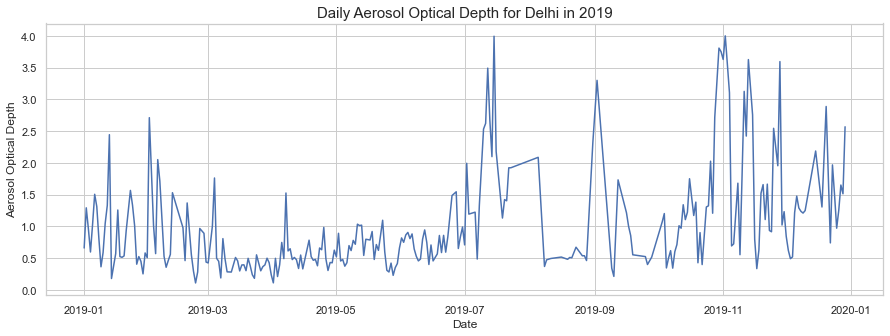

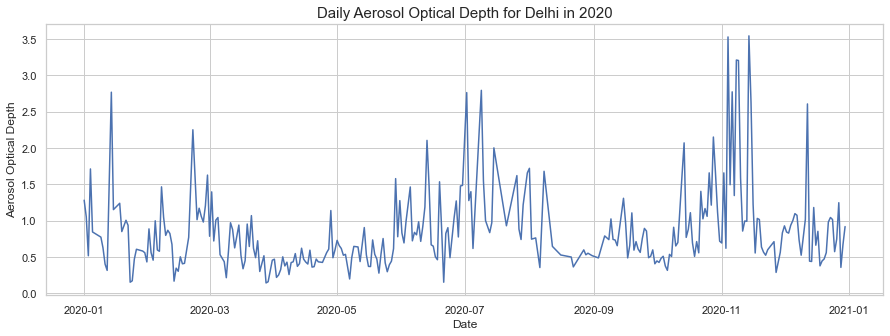

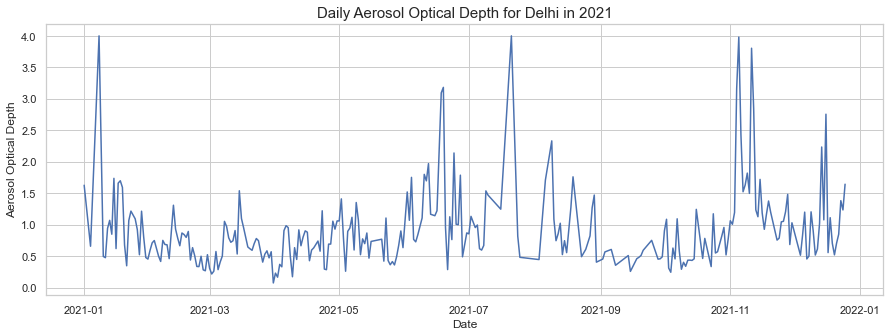

In [95]:
yrs=['2019','2020','2021']
for i in yrs:
    aerosoldf = pd.read_csv('data\\gee\\aod_stat_del'+i+'.csv')
    aerosoldf = normal_time(aerosoldf)
    severity_aod(aerosoldf,i)
    # we create a figure with pyplot and set the dimensions to 15 x 7
    fig, ax = plt.subplots(figsize=(15,5))
    # we'll create the plot by setting our dataframe to the data argument
    ax.plot(aerosoldf.index, aerosoldf.mean_stat)
    # we'll set the labels and title
    ax.set_ylabel('Aerosol Optical Depth',fontsize=12)
    ax.set_xlabel('Date',fontsize=12)
    ax.set_title('Daily Aerosol Optical Depth for Delhi in '+i,fontsize=15)
    fig.savefig('delhi_data\Aerosol_Depth'+i+'.jpg')
    #plt.show()

In [94]:
def severity_aod(aerosoldf,yr):  
    # Retrieve year information from date index
    aerosoldf['month'] = aerosoldf.index.month
    #Define AOD threshold as 1 
    aerosoldf['threshold'] = 1
    #Create a binary column which takes value 1 when AOD exceeds threshold and 0 otherwise
    aerosoldf['severe'] = np.where(aerosoldf['mean_stat'] > aerosoldf['threshold'], 1,0)
    #Group the observations and count the number of days having severe pollution in each year
    aerosol = aerosoldf.groupby('month').agg(obs_days = pd.NamedAgg(column = 'severe', aggfunc = 'count'),
                                        severe_days = pd.NamedAgg(column = 'severe', aggfunc = 'sum'))
    aerosol.to_csv('delhi_data\severity_aod'+yr+'.csv',index=True)
    print("For the year ",yr)
    print(aerosol)